### Needed libraries

In [18]:
#data structure
import numpy as np
import pandas as pd

#statistical library
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
#plots
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#Model tranning and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics

#Model accuracy meaurements
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import learning_curve

In [19]:
data=pd.read_csv(r"C:\Users\123cr\Desktop\OBL 2 project\Marketing stratergy old.csv")
data

food_category  store_sales(in millions)  store_cost(in millions)  \
0     Breakfast Foods                      5.52                   2.5944   
1     Breakfast Foods                      3.68                   1.1776   
2     Breakfast Foods                      5.44                   2.5568   
3     Breakfast Foods                      3.74                   1.6082   
4     Breakfast Foods                      4.08                   1.4688   
...               ...                       ...                      ...   
8111        Specialty                      6.90                   2.2770   
8112        Specialty                      4.80                   2.3520   
8113        Specialty                      2.97                   0.9504   
8114        Specialty                      5.52                   2.0424   
8115        Specialty                      8.28                   2.5668   

      unit_sales(in millions)         promotion_name sales_country  \
0                           3  Cash Register Lottery           USA   
1                           2  Cash Register Lottery           USA   
2                           4  Cash Register Lottery           USA   
3                           2  Cash Register Lottery           USA   
4                           3  Cash Register Lottery           USA   
...                       ...                    ...           ...   
8111                        3      Pick Your Savings        Mexico   
8112                        3           Super Savers        Mexico   
8113                        3           Super Savers        Mexico   
8114                        2             Sales Days           USA   
8115                        3             Sales Days        Canada   

     marital_status gender            education member_card  ...  \
0                 M      M     Bachelors Degree      Silver  ...   
1                 M      F   High School Degree      Bronze  ...   
2                 S      F   High School Degree      Bronze  ...   
3                 S      M  Partial High School      Bronze  ...   
4                 S      F  Partial High School      Normal  ...   
...             ...    ...                  ...         ...  ...   
8111              S      F     Bachelors Degree      Silver  ...   
8112              M      F     Bachelors Degree      Silver  ...   
8113              M      F  Partial High School      Normal  ...   
8114              S      M   High School Degree      Bronze  ...   
8115              S      M     Bachelors Degree      Bronze  ...   

     avg yearly_income          store_type   store_city store_state  \
0          $50K - $70K  Deluxe Supermarket        Salem          OR   
1          $30K - $50K  Deluxe Supermarket        Salem          OR   
2          $30K - $50K  Deluxe Supermarket        Salem          OR   
3          $50K - $70K  Deluxe Supermarket        Salem          OR   
4          $10K - $30K  Deluxe Supermarket        Salem          OR   
...                ...                 ...          ...         ...   
8111       $50K - $70K  Deluxe Supermarket      Hidalgo   Zacatecas   
8112       $50K - $70K    Mid-Size Grocery  Mexico City          DF   
8113       $10K - $30K    Mid-Size Grocery  Mexico City          DF   
8114       $30K - $50K         Supermarket    Bremerton          WA   
8115       $70K - $90K    Mid-Size Grocery     Victoria          BC   

     store_sqft  grocery_sqft  frozen_sqft  meat_sqft  \
0         27694         18670         5415       3610   
1         27694         18670         5415       3610   
2         27694         18670         5415       3610   
3         27694         18670         5415       3610   
4         27694         18670         5415       3610   
...         ...           ...          ...        ...   
8111      30584         21938         5188       3458   
8112      36509         22450         8435       5624   
8113      36509         22450         8435       5624   
8114      3969

### Needed Variables

In [20]:
data=data[['cost','food_category','sales_country','promotion_name']]
data

cost    food_category sales_country         promotion_name
0      59.86  Breakfast Foods           USA  Cash Register Lottery
1      95.78  Breakfast Foods           USA  Cash Register Lottery
2      95.78  Breakfast Foods           USA  Cash Register Lottery
3      59.86  Breakfast Foods           USA  Cash Register Lottery
4      59.86  Breakfast Foods           USA  Cash Register Lottery
...      ...              ...           ...                    ...
8111  141.38        Specialty        Mexico      Pick Your Savings
8112  101.61        Specialty        Mexico           Super Savers
8113  101.61        Specialty        Mexico           Super Savers
8114   62.71        Specialty           USA             Sales Days
8115  132.88        Specialty        Canada             Sales Days

[8116 rows x 4 columns]

### dataset structure

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cost            8116 non-null   float64
 1   food_category   8116 non-null   object 
 2   sales_country   8116 non-null   object 
 3   promotion_name  8116 non-null   object 
dtypes: float64(1), object(3)
memory usage: 253.8+ KB


In [22]:
data.describe()

cost
count  8116.000000
mean     94.405251
std      34.320499
min      51.120000
25%      59.860000
50%      95.780000
75%     123.610000
max     147.170000

In [23]:
data.isnull().sum()

cost              0
food_category     0
sales_country     0
promotion_name    0
dtype: int64

### outlier removal

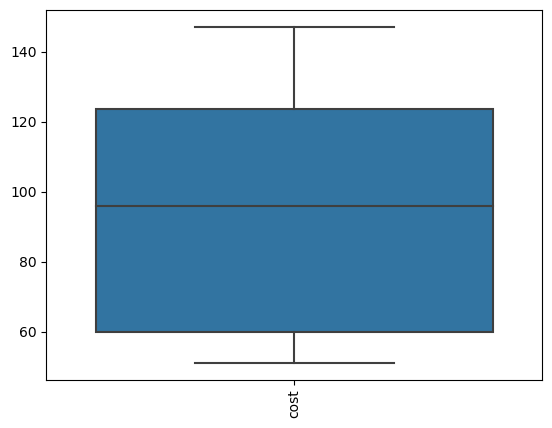

In [24]:
dataNumeric = data.select_dtypes(exclude='object')
sns.boxplot(data=data)
plt.xticks(rotation=90) 
plt.show()

In [25]:
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.
              format(column, 
        nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.
              format(column, nr_values))

The number of values for feature cost :43
The number of values for feature food_category :45
The number of values for feature sales_country :3 -- ['Canada' 'Mexico' 'USA']
The number of values for feature promotion_name :7 -- ['Best Savings' 'Big Promo' 'Cash Register Lottery' 'Pick Your Savings'
 'Sales Days' 'Super Savers' 'Wallet Savers']


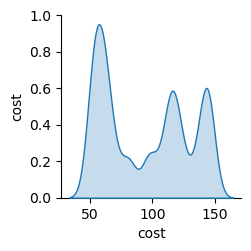

In [26]:
sns.pairplot(data,diag_kind='kde')

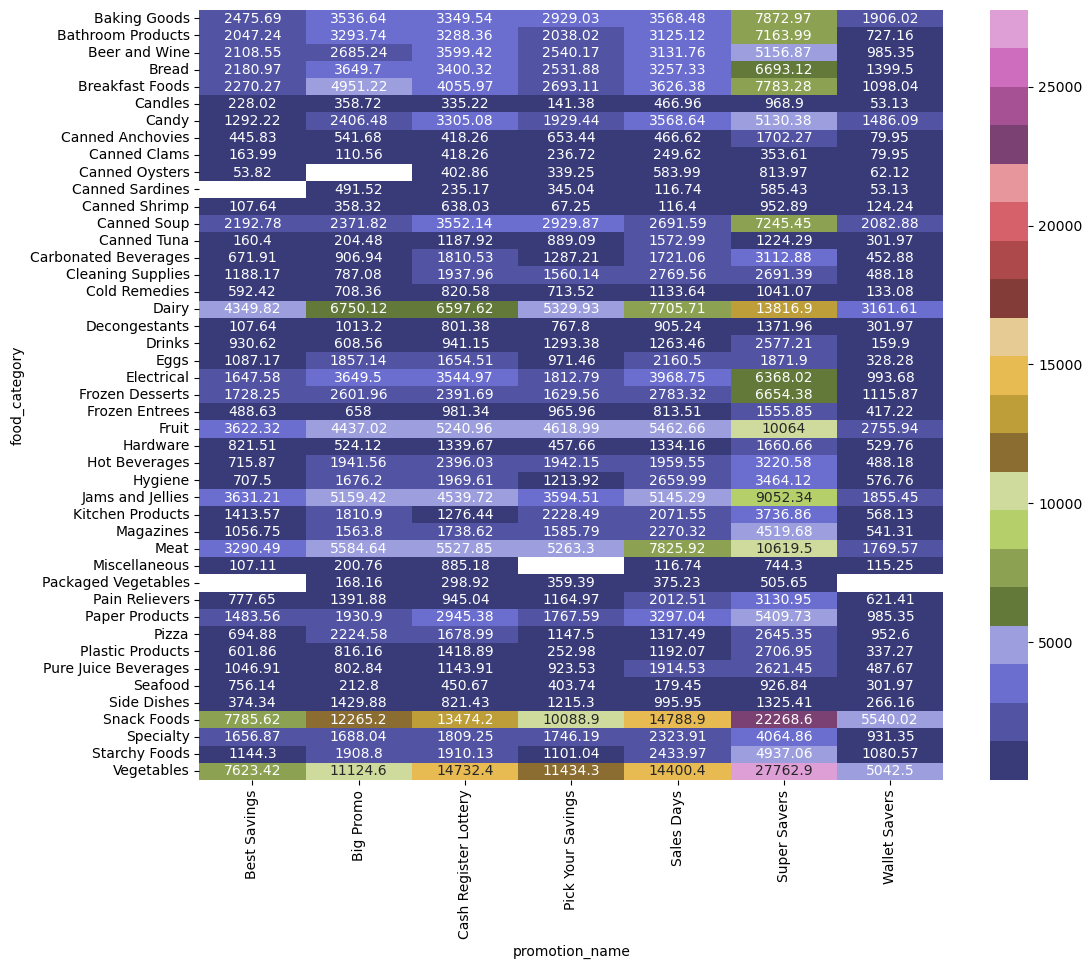

In [27]:
pivot_table = data.pivot_table(values='cost', index='food_category', columns='promotion_name', aggfunc=np.sum)
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='tab20b')
plt.show()

### distribution

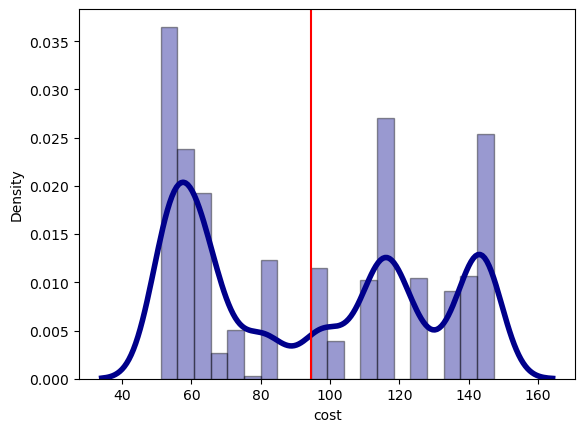

In [10]:
sns.distplot(data['cost'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
mean=data['cost'].mean()
plt.axvline(mean,0,1,color='red')

In [11]:
print(data.columns)

Index(['food_category', 'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'education', 'member_card', 'occupation',
       'avg yearly_income', 'store_type', 'store_city', 'store_state',
       'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'media_type',
       'cost'],
      dtype='object')


### dummy assigning

In [12]:
Dummy_column=['food_category','sales_country','promotion_name']

In [13]:
data=pd.get_dummies(data,columns =Dummy_column,dtype=int)
data

store_sales(in millions)  store_cost(in millions)  \
0                         5.52                   2.5944   
1                         3.68                   1.1776   
2                         5.44                   2.5568   
3                         3.74                   1.6082   
4                         4.08                   1.4688   
...                        ...                      ...   
8111                      6.90                   2.2770   
8112                      4.80                   2.3520   
8113                      2.97                   0.9504   
8114                      5.52                   2.0424   
8115                      8.28                   2.5668   

      unit_sales(in millions) marital_status gender            education  \
0                           3              M      M     Bachelors Degree   
1                           2              M      F   High School Degree   
2                           4              S      F   High School Degree   
3                           2              S      M  Partial High School   
4                           3              S      F  Partial High School   
...                       ...            ...    ...                  ...   
8111                        3              S      F     Bachelors Degree   
8112                        3              M      F     Bachelors Degree   
8113                        3              M      F  Partial High School   
8114                        2              S      M   High School Degree   
8115                        3              S      M     Bachelors Degree   

     member_card      occupation avg yearly_income          store_type  ...  \
0         Silver    Professional       $50K - $70K  Deluxe Supermarket  ...   
1         Bronze          Manual       $30K - $50K  Deluxe Supermarket  ...   
2         Bronze  Skilled Manual       $30K - $50K  Deluxe Supermarket  ...   
3         Bronze          Manual       $50K - $70K  Deluxe Supermarket  ...   
4         Normal  Skilled Manual       $10K - $30K  Deluxe Supermarket  ...   
...          ...             ...               ...                 ...  ...   
8111      Silver    Professional       $50K - $70K  Deluxe Supermarket  ...   
8112      Silver    Professional       $50K - $70K    Mid-Size Grocery  ...   
8113      Normal  Skilled Manual       $10K - $30K    Mid-Size Grocery  ...   
8114      Bronze          Manual       $30K - $50K         Supermarket  ...   
8115      Bronze    Professional       $70K - $90K    Mid-Size Grocery  ...   

     sales_country_Canada sales_country_Mexico  sales_country_USA  \
0                       0                    0                  1   
1                       0                    0                  1   
2                       0                    0                  1   
3                       0                    0                  1   
4                       0                    0                  1   
...                   ...                  ...                ...   
8111                    0                    1                  0   
8112                    0                    1                  0   
8113                    0                    1                  0   
8114                    0                    0                  1   
8115                    1                    0                  0   

      promotion_name_Best Savings  promotion_name_Big Promo  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
8111                            0                         0   
8112                            0                         0   
8113                            0      

### Defining x and y

In [14]:
x= data.drop('cost',axis=1)
y= data['cost']
x

store_sales(in millions)  store_cost(in millions)  \
0                         5.52                   2.5944   
1                         3.68                   1.1776   
2                         5.44                   2.5568   
3                         3.74                   1.6082   
4                         4.08                   1.4688   
...                        ...                      ...   
8111                      6.90                   2.2770   
8112                      4.80                   2.3520   
8113                      2.97                   0.9504   
8114                      5.52                   2.0424   
8115                      8.28                   2.5668   

      unit_sales(in millions) marital_status gender            education  \
0                           3              M      M     Bachelors Degree   
1                           2              M      F   High School Degree   
2                           4              S      F   High School Degree   
3                           2              S      M  Partial High School   
4                           3              S      F  Partial High School   
...                       ...            ...    ...                  ...   
8111                        3              S      F     Bachelors Degree   
8112                        3              M      F     Bachelors Degree   
8113                        3              M      F  Partial High School   
8114                        2              S      M   High School Degree   
8115                        3              S      M     Bachelors Degree   

     member_card      occupation avg yearly_income          store_type  ...  \
0         Silver    Professional       $50K - $70K  Deluxe Supermarket  ...   
1         Bronze          Manual       $30K - $50K  Deluxe Supermarket  ...   
2         Bronze  Skilled Manual       $30K - $50K  Deluxe Supermarket  ...   
3         Bronze          Manual       $50K - $70K  Deluxe Supermarket  ...   
4         Normal  Skilled Manual       $10K - $30K  Deluxe Supermarket  ...   
...          ...             ...               ...                 ...  ...   
8111      Silver    Professional       $50K - $70K  Deluxe Supermarket  ...   
8112      Silver    Professional       $50K - $70K    Mid-Size Grocery  ...   
8113      Normal  Skilled Manual       $10K - $30K    Mid-Size Grocery  ...   
8114      Bronze          Manual       $30K - $50K         Supermarket  ...   
8115      Bronze    Professional       $70K - $90K    Mid-Size Grocery  ...   

     sales_country_Canada sales_country_Mexico  sales_country_USA  \
0                       0                    0                  1   
1                       0                    0                  1   
2                       0                    0                  1   
3                       0                    0                  1   
4                       0                    0                  1   
...                   ...                  ...                ...   
8111                    0                    1                  0   
8112                    0                    1                  0   
8113                    0                    1                  0   
8114                    0                    0                  1   
8115                    1                    0                  0   

      promotion_name_Best Savings  promotion_name_Big Promo  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
8111                            0                         0   
8112                            0                         0   
8113                            0      

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8116 entries, 0 to 8115
Data columns (total 73 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   store_sales(in millions)              8116 non-null   float64
 1   store_cost(in millions)               8116 non-null   float64
 2   unit_sales(in millions)               8116 non-null   int64  
 3   marital_status                        8116 non-null   object 
 4   gender                                8116 non-null   object 
 5   education                             8116 non-null   object 
 6   member_card                           8116 non-null   object 
 7   occupation                            8116 non-null   object 
 8   avg yearly_income                     8116 non-null   object 
 9   store_type                            8116 non-null   object 
 10  store_city                            8116 non-null   object 
 11  store_state      

## Before Dimensionality reduction

### Spliting and Scaler fitting

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=42)

In [17]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

ValueError: could not convert string to float: 'S'

### Linear Regression

#### Hyperparameter Tuning

In [19]:
%%time
parameter = {
    'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), parameter, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'fit_intercept': False}
Test accuracy: 0.3774065695782125
CPU times: total: 797 ms
Wall time: 215 ms


In [20]:
model=LinearRegression(fit_intercept=False)
model.fit(xtrain,ytrain)
prediction_train = model.predict(xtrain)
prediction_test = model.predict(xtest)
prediction_test
# Evaluate the model
print('Training Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytrain, prediction_train))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytrain, prediction_train))
print('R-squared (R2):', r2_score(ytrain, prediction_train))

print('\nTesting Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytest, prediction_test))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytest,prediction_test))
print('R-squared (R2):', r2_score(ytest,prediction_test))

Training Metrics:

Mean Squared Error (MSE): 714.6428951088839
Mean Absolute Error (MAE): 22.749065773259396
R-squared (R2): 0.3955266804208625

Testing Metrics:

Mean Squared Error (MSE): 721.9575770231199
Mean Absolute Error (MAE): 22.86736029864532
R-squared (R2): 0.3774065695782125


#### checking overfitting or underfitting

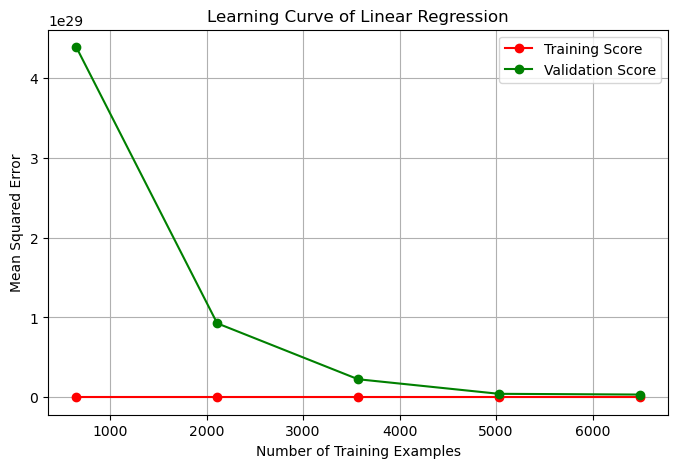

In [21]:
train_sizes, train_scores, val_scores = learning_curve(model, x, y, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean,'o-', label='Training Score', color='red')
plt.plot(train_sizes, val_scores_mean,'o-', label='Validation Score', color='green')

plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of Linear Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Random forest regressor

#### Hyperparameter Tuning

In [22]:
%%time
parameter2 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(RandomForestRegressor(), parameter2,scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Test accuracy: 0.44406103951349196
CPU times: total: 5min 28s
Wall time: 7min 6s


In [23]:
model2=RandomForestRegressor(max_depth=None,max_features='log2', 
                            min_samples_leaf=4, min_samples_split=10, 
                            n_estimators=150)
training=model2.fit(xtrain,ytrain)
prediction_train = model2.predict(xtrain)
prediction_test = model2.predict(xtest)
prediction_test
# Evaluate the model
print('Training Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytrain, prediction_train))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytrain, prediction_train))
print('R-squared (R2):', r2_score(ytrain, prediction_train))

print('\nTesting Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytest, prediction_test))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytest,prediction_test))
print('R-squared (R2):', r2_score(ytest,prediction_test))

Training Metrics:

Mean Squared Error (MSE): 624.5039101680512
Mean Absolute Error (MAE): 20.571852829985932
R-squared (R2): 0.4717698108340982

Testing Metrics:

Mean Squared Error (MSE): 642.9708427934706
Mean Absolute Error (MAE): 20.735203082162847
R-squared (R2): 0.44552223646354894


#### checking overfitting or underfitting

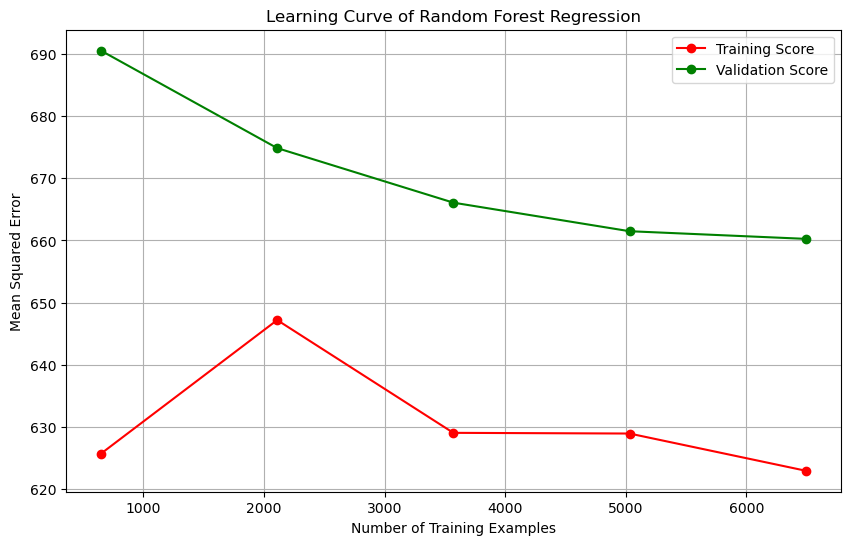

In [24]:
train_sizes, train_scores, val_scores = learning_curve(model2, x, y, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean,'o-', label='Training Score', color='red')
plt.plot(train_sizes, val_scores_mean,'o-', label='Validation Score', color='green')

plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of Random Forest Regression')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## After Dimensionality reduction

In [25]:
x= data.drop('cost',axis=1)
y= data['cost']
x

food_category_Baking Goods  food_category_Bathroom Products  \
0                              0                                0   
1                              0                                0   
2                              0                                0   
3                              0                                0   
4                              0                                0   
...                          ...                              ...   
8111                           0                                0   
8112                           0                                0   
8113                           0                                0   
8114                           0                                0   
8115                           0                                0   

      food_category_Beer and Wine  food_category_Bread  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   
...                           ...                  ...   
8111                            0                    0   
8112                            0                    0   
8113                            0                    0   
8114                            0                    0   
8115                            0                    0   

      food_category_Breakfast Foods  food_category_Candles  \
0                                 1                      0   
1                                 1                      0   
2                                 1                      0   
3                                 1                      0   
4                                 1                      0   
...                             ...                    ...   
8111                              0                      0   
8112                              0                      0   
8113                              0                      0   
8114                              0                      0   
8115                              0                      0   

      food_category_Candy  food_category_Canned Anchovies  \
0                       0                               0   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   
...                   ...                             ...   
8111                    0                               0   
8112                    0                               0   
8113                    0                               0   
8114                    0                               0   
8115                    0                               0   

      food_category_Canned Clams  food_category_Canned Oysters  ...  \
0                              0                             0  ...   
1                              0                             0  ...   
2                              0                             0  ...   
3                              0                             0  ...   
4                              0                             0  ...   
...                          ...                           ...  ...   
8111                           0                             0  ...   
8112                           0                             0  ...   
8113                           0                             0  ...   
8114                           0                             0  ...   
8115                           0                             0  ...   

      sales_country_Canada  sales_country_Mexico  sales_country_USA  \
0                        0                     0                  1   
1      

In [26]:
dt = DecisionTreeRegressor(random_state=10, criterion  = 'squared_error', max_depth = 10)
dt.fit(x,y)

DecisionTreeRegressor(max_depth=10, random_state=10)

In [27]:
for i, column in enumerate(data.drop('cost', axis = 1)):
    fi= pd.DataFrame({'Variable': [column], 'Feature Importance Score': 
                       [dt.feature_importances_[i]]})
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
Final=final_fi.sort_values('Feature Importance Score',ascending=False).reset_index()
Final.head(50)

index                              Variable  Feature Importance Score
0      47                     sales_country_USA                  0.483821
1      53           promotion_name_Super Savers                  0.190816
2      52             promotion_name_Sales Days                  0.165247
3      51      promotion_name_Pick Your Savings                  0.046304
4      54          promotion_name_Wallet Savers                  0.037516
5      48           promotion_name_Best Savings                  0.027288
6      46                  sales_country_Mexico                  0.007835
7      49              promotion_name_Big Promo                  0.006241
8       6                   food_category_Candy                  0.003490
9      15       food_category_Cleaning Supplies                  0.002740
10     41             food_category_Snack Foods                  0.002357
11     19                  food_category_Drinks                  0.002018
12     37        food_category_Plastic Products                  0.001679
13     14    food_category_Carbonated Beverages                  0.001653
14     29        food_category_Kitchen Products                  0.001650
15     36                   food_category_Pizza                  0.001613
16     30               food_category_Magazines                  0.001545
17      8            food_category_Canned Clams                  0.001480
18      9          food_category_Canned Oysters                  0.001236
19     21              food_category_Electrical                  0.001209
20      5                 food_category_Candles                  0.001033
21     39                 food_category_Seafood                  0.000992
22     38    food_category_Pure Juice Beverages                  0.000960
23     13             food_category_Canned Tuna                  0.000932
24     40             food_category_Side Dishes                  0.000881
25     20                    food_category_Eggs                  0.000807
26     10         food_category_Canned Sardines                  0.000804
27     11           food_category_Canned Shrimp                  0.000774
28     31                    food_category_Meat                  0.000732
29      0            food_category_Baking Goods                  0.000629
30      7        food_category_Canned Anchovies                  0.000609
31     16           food_category_Cold Remedies                  0.000506
32     25                food_category_Hardware                  0.000474
33     50  promotion_name_Cash Register Lottery                  0.000401
34     33     food_category_Packaged Vegetables                  0.000388
35     24                   food_category_Fruit                  0.000369
36     26           food_category_Hot Beverages                  0.000214
37      4         food_category_Breakfast Foods                  0.000212
38      3                   food_category_Bread                  0.000207
39     35          food_category_Paper Products                  0.000133
40     23          food_category_Frozen Entrees                  0.000131
41      2           food_category_Beer and Wine                  0.000075
42     28        food_category_Jams and Jellies                  0.000000
43     17                   food_category_Dairy                  0.000000
44     12             food_category_Canned Soup                  0.000000
45     42               food_category_Specialty                  0.000000
46     45                  sales_country_Canada                  0.000000
47     44              food_category_Vegetables                  0.000000
48     43           food_category_Starchy Foods                  0.000000
49      1       food_category_Bathroom Products                  0.000000

In [28]:
feature_importances = dt.feature_importances_ >=0.002018
selected_features = x.columns[feature_importances]
x_selected = data[selected_features]
x=x_selected
x

food_category_Candy  food_category_Cleaning Supplies  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   
...                   ...                              ...   
8111                    0                                0   
8112                    0                                0   
8113                    0                                0   
8114                    0                                0   
8115                    0                                0   

      food_category_Snack Foods  sales_country_Mexico  sales_country_USA  \
0                             0                     0                  1   
1                             0                     0                  1   
2                             0                     0                  1   
3                             0                     0                  1   
4                             0                     0                  1   
...                         ...                   ...                ...   
8111                          0                     1                  0   
8112                          0                     1                  0   
8113                          0                     1                  0   
8114                          0                     0                  1   
8115                          0                     0                  0   

      promotion_name_Best Savings  promotion_name_Big Promo  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
8111                            0                         0   
8112                            0                         0   
8113                            0                         0   
8114                            0                         0   
8115                            0                         0   

      promotion_name_Pick Your Savings  promotion_name_Sales Days  \
0                                    0                          0   
1                                    0                          0   
2                                    0                          0   
3                                    0                          0   
4                                    0                          0   
...                                ...                        ...   
8111                                 1                          0   
8112                                 0                          0   
8113                                 0                          0   
8114                                 0                          1   
8115                                 0                          1   

      promotion_name_Super Savers  promotion_name_Wallet Savers  
0                               0                             0  
1                               0                             0  
2                               0                             0  
3                               0                             0  
4                               0                             0  
...                           ...                           ...  
8111                            0                             0  
8112                            1                             0  
8113                            1                             0  
8114                            0                             0  
8115                            0   

### Spliting and Scaler fitting

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=10)

In [30]:
scaler= MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Linear Regression

#### Hyperparameter Tuning

In [32]:
%%time
parameter = {
    'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), parameter, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'fit_intercept': True}
Test accuracy: 0.39307708073622816
CPU times: total: 109 ms
Wall time: 63.5 ms


In [33]:
model=LinearRegression(fit_intercept=True)
model.fit(xtrain,ytrain)
prediction_train = model.predict(xtrain)
prediction_test = model.predict(xtest)
prediction_test
# Evaluate the model
print('Training Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytrain, prediction_train))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytrain, prediction_train))
print('R-squared (R2):', r2_score(ytrain, prediction_train))

print('\nTesting Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytest, prediction_test))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytest,prediction_test))
print('R-squared (R2):', r2_score(ytest,prediction_test))

Training Metrics:

Mean Squared Error (MSE): 717.425605453604
Mean Absolute Error (MAE): 22.795211914438234
R-squared (R2): 0.3898579008553472

Testing Metrics:

Mean Squared Error (MSE): 719.4105364683431
Mean Absolute Error (MAE): 22.94319340218269
R-squared (R2): 0.39307708073622816


#### checking overfitting or underfitting

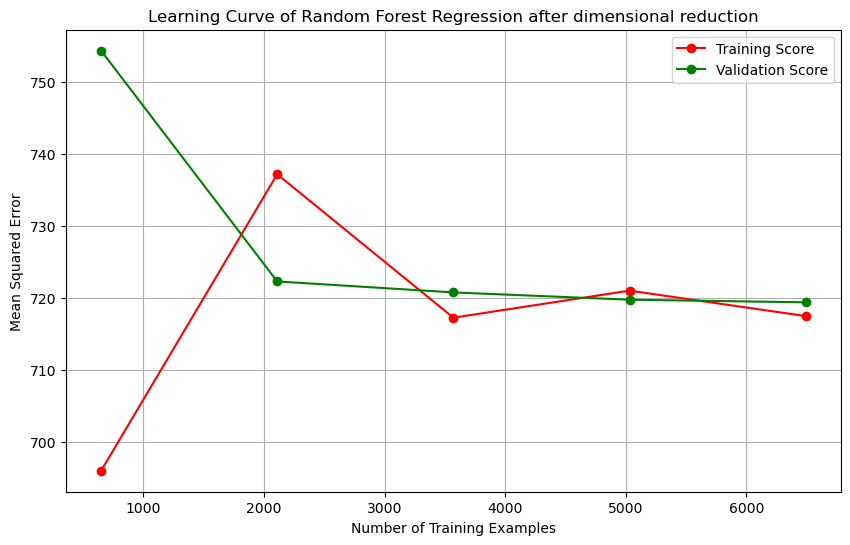

In [34]:
train_sizes, train_scores, val_scores = learning_curve(model, x, y, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean,'o-', label='Training Score', color='red')
plt.plot(train_sizes, val_scores_mean,'o-', label='Validation Score', color='green')

plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of Random Forest Regression after dimensional reduction')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Random forest regressor

#### Hyperparameter Tuning

In [35]:
%%time
parameter2 = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(RandomForestRegressor(), parameter2,scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
test_accuracy =best_model.score(xtest, ytest)
print("Test accuracy:", test_accuracy)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Test accuracy: 0.45695481117773407
CPU times: total: 3min 35s
Wall time: 3min 57s


In [36]:
model2=RandomForestRegressor(max_depth=10,max_features='log2', 
                            min_samples_leaf=4, min_samples_split=2, 
                            n_estimators=50)
training=model2.fit(xtrain,ytrain)
prediction_train = model2.predict(xtrain)
prediction_test = model2.predict(xtest)
prediction_test
# Evaluate the model
print('Training Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytrain, prediction_train))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytrain, prediction_train))
print('R-squared (R2):', r2_score(ytrain, prediction_train))

print('\nTesting Metrics:')

print('\nMean Squared Error (MSE):', mean_squared_error(ytest, prediction_test))
print('Mean Absolute Error (MAE):', mean_absolute_error(ytest,prediction_test))
print('R-squared (R2):', r2_score(ytest,prediction_test))

Training Metrics:

Mean Squared Error (MSE): 640.5899117250825
Mean Absolute Error (MAE): 20.626197911604383
R-squared (R2): 0.45520361907948925

Testing Metrics:

Mean Squared Error (MSE): 643.1920586674551
Mean Absolute Error (MAE): 20.660873518257556
R-squared (R2): 0.4573779752933813


#### checking overfitting or underfitting

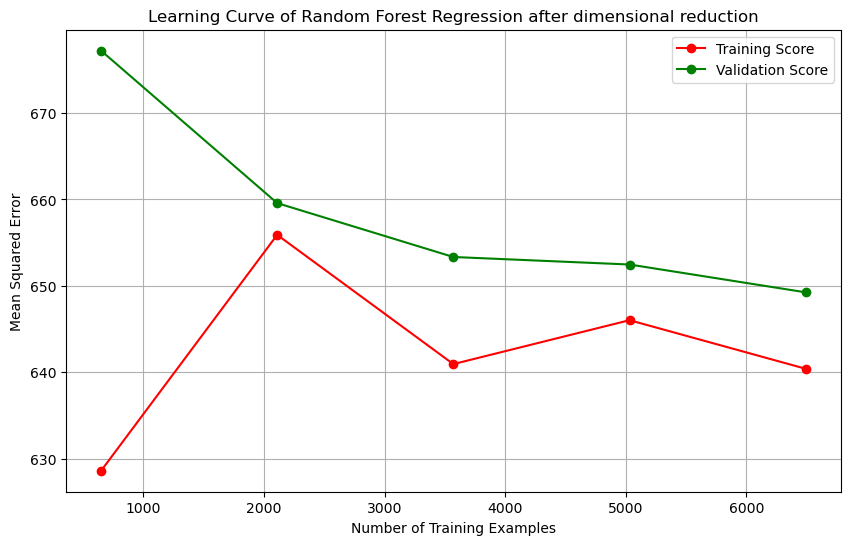

In [37]:
train_sizes, train_scores, val_scores = learning_curve(model2, x, y, scoring='neg_mean_squared_error')

train_scores_mean = -np.mean(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean,'o-', label='Training Score', color='red')
plt.plot(train_sizes, val_scores_mean,'o-', label='Validation Score', color='green')

plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve of Random Forest Regression after dimensional reduction')
plt.legend(loc='best')
plt.grid(True)
plt.show()